## DESCRIPTION
This project is about clustering the google review rating given by the users.      
In order to get the work done i performed Unsupervised technique of Machine Learning 

In [2]:
import os 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns 
import scipy.stats as sc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
os.getcwd()

'F:\\python\\practice ML modelling'

In [4]:
os.chdir(r'F:\python\practice ML modelling')

In [5]:
os.listdir() #checking the list of  datasets 

['(vasu)SVM KNN Naive_bayes and PCA test.ipynb',
 '.ipynb_checkpoints',
 'cum_var_test.csv',
 'EVALUATION CATEGORY.xlsx',
 'google_review_ratings.csv',
 'K means practice .ipynb',
 'KNN + SVM + Naive Bayes + PCA_Class Assessment.docx',
 'KNN + SVM + Naive Bayes + PCA_Class Assessment.pdf',
 'LOadings_wine.csv',
 'supervised model practice',
 'telecom filtered.csv',
 'Wine.csv']

In [6]:
google=pd.read_csv(r'google_review_ratings.csv') #loading the dataset

In [7]:
google.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


### checking the data types and rows and columns 

In [8]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

### investigating the outliers , there are no such outliers 

In [9]:
google.describe(percentiles=[.9,.95,.97,.99]).T

,count,mean,std,min,50%,90%,95%,97%,99%,max
Category 1,5456.0,1.455720,0.827604,0.00,1.340,2.380,2.6400,3.6600,5.0000,5.00
Category 2,5456.0,2.319707,1.421438,0.00,1.905,5.000,5.0000,5.0000,5.0000,5.00
Category 3,5456.0,2.489331,1.247815,0.00,2.060,5.000,5.0000,5.0000,5.0000,5.00
Category 4,5456.0,2.796886,1.309159,0.83,2.460,5.000,5.0000,5.0000,5.0000,5.00
Category 5,5456.0,2.958941,1.339056,1.12,2.670,5.000,5.0000,5.0000,5.0000,5.00
Category 6,5456.0,2.893490,1.282400,1.11,2.680,5.000,5.0000,5.0000,5.0000,5.00
Category 7,5456.0,3.351395,1.413492,1.12,3.230,5.000,5.0000,5.0000,5.0000,5.00
Category 8,5456.0,2.540795,1.111391,0.86,2.170,4.140,5.0000,5.0000,5.0000,5.00
Category 9,5456.0,3.126019,1.356802,0.84,2.800,5.000,5.0000,5.0000,5.0000,5.00
Category 10,5456.0,2.832729,1.307665,0.81,2.680,5.000,5.0000,5.0000,5.0000,5.00


**_Correlation metrix_**

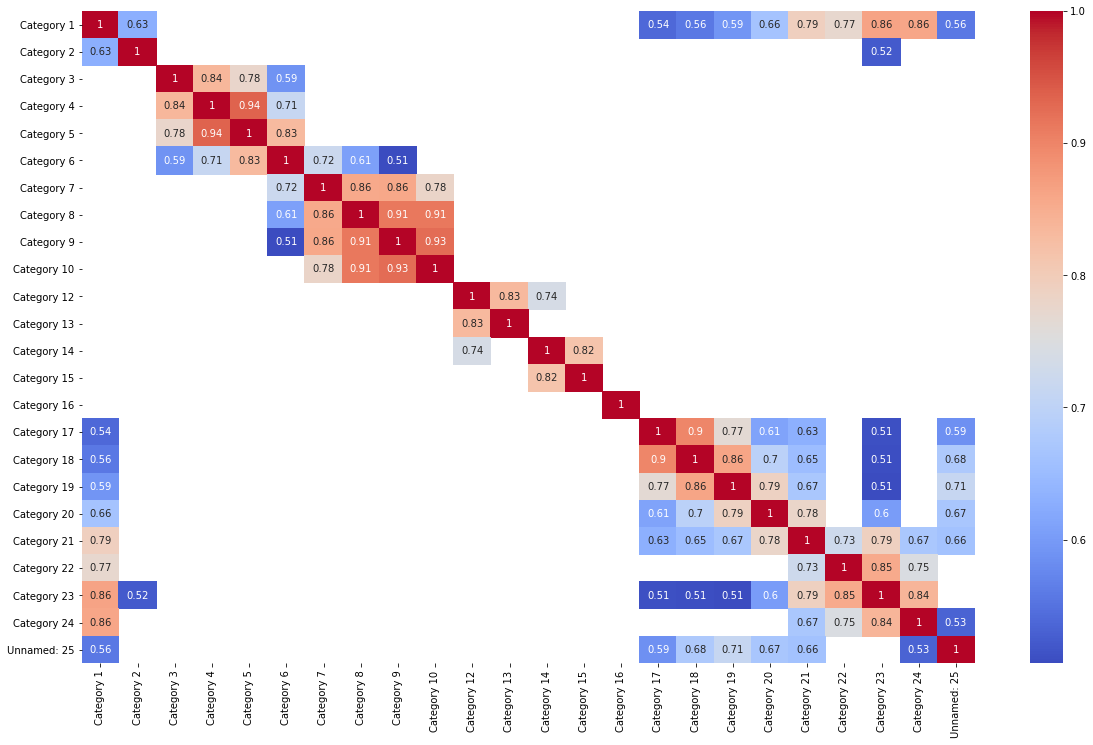

In [10]:
google_corr=google.corr()
corr_matrix = google_corr.corr() 

filter_corr = corr_matrix[corr_matrix > 0.5]
plt.figure(figsize=(20,12))
sns.heatmap(filter_corr,cmap='coolwarm',annot=True);

In [11]:
google=google.drop(columns=['User'],axis=1)# droped the columns named "users" in order to standardise the data 
google['Category 11']=pd.to_numeric(google['Category 11'],errors ='coerce') # change the object dtypes into numeric 


### investigating the null values 

In [12]:
google .isnull

Category 1        0
Category 23       0
Category 22       0
Category 21       0
Category 20       0
Category 19       0
Category 18       0
Category 17       0
Category 16       0
Category 15       0
Category 14       0
Category 13       0
Category 10       0
Category 9        0
Category 8        0
Category 7        0
Category 6        0
Category 5        0
Category 4        0
Category 3        0
Category 2        0
Category 24       1
Category 11       1
Category 12       1
Unnamed: 25    5454
dtype: int64

### Treated the null values with median 

In [13]:
google.fillna(google['Category 12'].median(),inplace=True)
google.fillna(google['Category 24'].median(),inplace=True)
google.drop(columns='Unnamed: 25',inplace=True) #droped the unnnamed column

In [14]:
google.isnull().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64

In [15]:
google.columns

Index(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10',
       'Category 11', 'Category 12', 'Category 13', 'Category 14',
       'Category 15', 'Category 16', 'Category 17', 'Category 18',
       'Category 19', 'Category 20', 'Category 21', 'Category 22',
       'Category 23', 'Category 24'],
      dtype='object')

STANDARDIASE THE DATA 

In [16]:
std=StandardScaler()
google_std=std.fit(google)
scaled_google=pd.DataFrame(google_std.transform(google),columns=google.columns)

### PCA

In [72]:
pca=PCA()
google_pca_model=pca.fit(scaled_google)
# google_pca_model=pd.DataFrame(google_pca_model.transform(scaled_google), columns = ['PC1','PC2','PC3','PC4','PC5','pc6','pc7' ])

In [73]:
google_pca_model.explained_variance_ #eigen value 

array([4.71954707, 3.49434357, 1.84977447, 1.59793926, 1.26458958,
       1.1424795 , 1.06855466, 0.99582162, 0.78408477, 0.71399843,
       0.64134171, 0.60520409, 0.57894001, 0.51684111, 0.51026615,
       0.46622654, 0.4439419 , 0.43867521, 0.42937891, 0.40050681,
       0.37397659, 0.34723147, 0.33014007, 0.29059614])

>> *SELECT THE COMPONENTS ACCORDING TO THE EIGEN VALUE*

In [74]:
pca=PCA(n_components=7)
google_pca_model=pca.fit(scaled_google)
google_pca_model1=pd.DataFrame(google_pca_model.transform(scaled_google), columns = ['PC1','PC2','PC3','PC4','PC5','pc6','pc7' ])

In [75]:
km=KMeans()


### running clusters into for loop between in range of 1,8 to get a fine cluster point 

In [77]:
google_cl=[]
for i in range(1, 8):
    km=KMeans(n_clusters=i)
    km_result=km.fit(google_pca_model1)
    google_cl.append(km_result.inertia_)
    print("cluster ={} and wcss ={}".format(i, km_result.inertia_))

cluster =1 and wcss =82572.76609746022
cluster =2 and wcss =63986.38813738427
cluster =3 and wcss =51514.201589091186
cluster =4 and wcss =43924.679680932066
cluster =5 and wcss =39632.442387107025
cluster =6 and wcss =35799.693485124575
cluster =7 and wcss =32859.66494248729


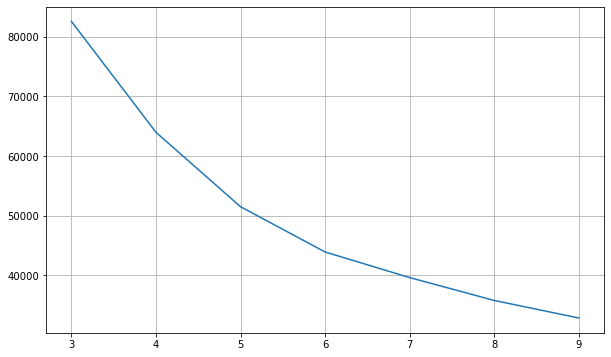

In [79]:
plt.figure(figsize=(10,6))
plt.plot(range(3, 10), google_cl)
plt.grid()
plt.show()


set clusters according to the cuts in the graphs

##### in above graph we have a cut at 4,5,6

### cluster 4

In [23]:
km4=KMeans(n_clusters=4)
km_result4=km4.fit(google)
google['cluster4']=km_result4.labels_

### cluster 5

In [24]:
km5=KMeans(n_clusters=5)
km_result5=km5.fit(google)
google['cluster5']=km_result5.labels_

In [25]:
# km7=KMeans(n_clusters=7)
# km_result7=km7.fit(google)
# google['cluster7']=km_result7.labels_

In [26]:
google['cluster5'].value_counts()

2    1550
0    1243
3    1023
1     942
4     698
Name: cluster5, dtype: int64

In [27]:
google

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,cluster4,cluster5
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,0,2
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,0,2
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,0,2
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,0,2
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,3,3
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,3,3
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,3,3
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,3,3


In [28]:
list(google.columns)

['Category 1',
 'Category 2',
 'Category 3',
 'Category 4',
 'Category 5',
 'Category 6',
 'Category 7',
 'Category 8',
 'Category 9',
 'Category 10',
 'Category 11',
 'Category 12',
 'Category 13',
 'Category 14',
 'Category 15',
 'Category 16',
 'Category 17',
 'Category 18',
 'Category 19',
 'Category 20',
 'Category 21',
 'Category 22',
 'Category 23',
 'Category 24',
 'cluster4',
 'cluster5']

##### grouping the category aggregate their mean and save them in clus_4

In [29]:
clus_4=google.groupby(['cluster4']).agg({'Category 1':['mean'],
 'Category 2':['mean'],
 'Category 3':['mean'],
 'Category 4':['mean'],
 'Category 5':['mean'],
 'Category 6':['mean'],
 'Category 7':['mean'],
 'Category 8':['mean'],
 'Category 9':['mean'],
 'Category 10':['mean'],
 'Category 11':['mean'],
 'Category 12':['mean'],
 'Category 13':['mean'],
 'Category 14':['mean'],
 'Category 15':['mean'],
 'Category 16':['mean'],
 'Category 17':['mean'],
 'Category 18':['mean'],
 'Category 19':['mean'],
 'Category 20':['mean'],
 'Category 21':['mean'],
 'Category 22':['mean'],
 'Category 23':['mean'],
 'Category 24':['mean'],
})


new_col=[]
for i in range(len(list(clus_4.columns))):
    
    new_col.append("_".join(list(clus_4.columns[i])))
    print("_".join(list(clus_4.columns[i])))
clus_4.columns=new_col
cluster_4=clus_4.T
cluster_4.columns=['c0','c1','c3','c4']

Category 1_mean
Category 2_mean
Category 3_mean
Category 4_mean
Category 5_mean
Category 6_mean
Category 7_mean
Category 8_mean
Category 9_mean
Category 10_mean
Category 11_mean
Category 12_mean
Category 13_mean
Category 14_mean
Category 15_mean
Category 16_mean
Category 17_mean
Category 18_mean
Category 19_mean
Category 20_mean
Category 21_mean
Category 22_mean
Category 23_mean
Category 24_mean


In [30]:
# for i in google.columns:
#     clus_4=google.groupby(['cluster4']).agg({i:["mean"]})


### Here are the categories at Cluster 4

In [31]:
clus_4

,Category 1_mean,Category 2_mean,Category 3_mean,Category 4_mean,Category 5_mean,Category 6_mean,Category 7_mean,Category 8_mean,Category 9_mean,Category 10_mean,...,Category 15_mean,Category 16_mean,Category 17_mean,Category 18_mean,Category 19_mean,Category 20_mean,Category 21_mean,Category 22_mean,Category 23_mean,Category 24_mean
cluster4,,,,,,,,,,,,,,,,,,,,,
0,1.479023,2.589588,3.205046,3.971080,4.392192,3.698199,3.364493,2.364927,2.608568,2.581639,...,1.292436,1.103250,0.726923,0.541791,0.555448,0.663375,0.825106,2.187640,1.889560,1.739257
1,1.167690,2.148092,1.866692,2.178443,2.386849,2.943610,4.161908,3.526466,4.513321,3.919215,...,2.092530,0.990257,0.655895,0.500439,0.513660,0.619014,0.683070,1.084827,0.992335,1.098299
2,0.984703,1.580302,1.983528,1.978429,2.076420,2.329168,3.500635,2.338356,3.168512,2.883809,...,4.167107,1.349802,1.164162,0.958502,0.978637,0.907232,0.753288,0.879188,0.799719,0.977294
3,2.275864,2.779160,2.639358,2.426421,2.126043,1.929745,1.973957,1.547875,1.901143,1.589008,...,2.189906,1.510850,1.582181,1.671624,2.369093,2.243484,1.828990,2.781945,2.383220,2.475345


In [32]:
google=google.copy()

In [33]:
list(google.columns)

['Category 1',
 'Category 2',
 'Category 3',
 'Category 4',
 'Category 5',
 'Category 6',
 'Category 7',
 'Category 8',
 'Category 9',
 'Category 10',
 'Category 11',
 'Category 12',
 'Category 13',
 'Category 14',
 'Category 15',
 'Category 16',
 'Category 17',
 'Category 18',
 'Category 19',
 'Category 20',
 'Category 21',
 'Category 22',
 'Category 23',
 'Category 24',
 'cluster4',
 'cluster5']

In [34]:
new_col

['Category 1_mean',
 'Category 2_mean',
 'Category 3_mean',
 'Category 4_mean',
 'Category 5_mean',
 'Category 6_mean',
 'Category 7_mean',
 'Category 8_mean',
 'Category 9_mean',
 'Category 10_mean',
 'Category 11_mean',
 'Category 12_mean',
 'Category 13_mean',
 'Category 14_mean',
 'Category 15_mean',
 'Category 16_mean',
 'Category 17_mean',
 'Category 18_mean',
 'Category 19_mean',
 'Category 20_mean',
 'Category 21_mean',
 'Category 22_mean',
 'Category 23_mean',
 'Category 24_mean']

### Describe the categories

In [35]:
dd=google[['Category 1',
 'Category 2',
 'Category 3',
 'Category 4',
 'Category 5',
 'Category 6',
 'Category 7',
 'Category 8',
 'Category 9',
 'Category 10',
 'Category 11',
 'Category 12',
 'Category 13',
 'Category 14',
 'Category 15',
 'Category 16',
 'Category 17',
 'Category 18',
 'Category 19',
 'Category 20',
 'Category 21',
 'Category 22',
 'Category 23',
 'Category 24']].describe()

In [36]:
dd.columns=new_col

In [37]:
 cluster_4.reset_index(inplace=True)

In [38]:
overall=pd.DataFrame(dd.T['mean'])

In [39]:
overall.reset_index(inplace=True)

In [40]:
overall4=pd.merge(overall,cluster_4,on=['index'],how='inner')

In [82]:
overall4

,index,mean,c0,c1,c3,c4
0,Category 1_mean,1.455720,1.479023,1.167690,0.984703,2.275864
1,Category 2_mean,2.319707,2.589588,2.148092,1.580302,2.779160
2,Category 3_mean,2.489331,3.205046,1.866692,1.983528,2.639358
3,Category 4_mean,2.796886,3.971080,2.178443,1.978429,2.426421
4,Category 5_mean,2.958941,4.392192,2.386849,2.076420,2.126043
5,Category 6_mean,2.893490,3.698199,2.943610,2.329168,1.929745
6,Category 7_mean,3.351395,3.364493,4.161908,3.500635,1.973957
7,Category 8_mean,2.540795,2.364927,3.526466,2.338356,1.547875
8,Category 9_mean,3.126019,2.608568,4.513321,3.168512,1.901143
9,Category 10_mean,2.832729,2.581639,3.919215,2.883809,1.589008


### in above dataframe we can observe the cluster of differnt categories at cluster=4

In [184]:
clus_5=google.groupby(['cluster5']).agg({'Category 1':['mean'],
 'Category 2':['mean'],
 'Category 3':['mean'],
 'Category 4':['mean'],
 'Category 5':['mean'],
 'Category 6':['mean'],
 'Category 7':['mean'],
 'Category 8':['mean'],
 'Category 9':['mean'],
 'Category 10':['mean'],
 'Category 11':['mean'],
 'Category 12':['mean'],
 'Category 13':['mean'],
 'Category 14':['mean'],
 'Category 15':['mean'],
 'Category 16':['mean'],
 'Category 17':['mean'],
 'Category 18':['mean'],
 'Category 19':['mean'],
 'Category 20':['mean'],
 'Category 21':['mean'],
 'Category 22':['mean'],
 'Category 23':['mean'],
 'Category 24':['mean'],
})


new_col=[]
for i in range(len(list(clus_5.columns))):
    
    new_col.append("_".join(list(clus_5.columns[i])))
    print("_".join(list(clus_5.columns[i])))
clus_5.columns=new_col
cluster_5=clus_5.T
cluster_5.columns=['c0','c1','c3','c5','c6']

Category 1_mean
Category 2_mean
Category 3_mean
Category 4_mean
Category 5_mean
Category 6_mean
Category 7_mean
Category 8_mean
Category 9_mean
Category 10_mean
Category 11_mean
Category 12_mean
Category 13_mean
Category 14_mean
Category 15_mean
Category 16_mean
Category 17_mean
Category 18_mean
Category 19_mean
Category 20_mean
Category 21_mean
Category 22_mean
Category 23_mean
Category 24_mean


In [185]:
dd.columns=new_col

In [186]:
overall5=pd.DataFrame(dd.T['mean']).reset_index()

In [187]:
cluster_5.reset_index(inplace=True)

In [188]:
overall5=pd.merge(cluster_5,overall5,on='index',how='inner')

In [189]:
overall5

,index,c0,c1,c3,c5,c6,mean
0,Category 1_mean,1.176693,0.967675,1.340252,2.308201,1.618266,1.455720
1,Category 2_mean,1.983435,1.577325,2.808574,2.798495,2.133123,2.319707
2,Category 3_mean,1.791408,1.980637,3.013284,2.607546,3.081948,2.489331
3,Category 4_mean,2.064714,1.968089,3.491794,2.348240,4.333668,2.796886
4,Category 5_mean,2.195615,2.029522,4.148652,2.107889,4.177994,2.958941
5,Category 6_mean,2.738053,2.275987,3.868948,1.927488,3.253309,2.893490
6,Category 7_mean,4.028544,3.490127,3.898368,1.976354,2.758954,3.351395
7,Category 8_mean,3.727699,2.329130,2.507374,1.545474,2.245788,2.540795
8,Category 9_mean,4.634288,3.186083,2.908200,1.882483,2.665272,3.126019
9,Category 10_mean,4.363025,2.904533,2.428497,1.545679,2.794642,2.832729


### in above dataframe we can observe the cluster of differnt categories at cluster=5

### Factor Analysis

In [49]:

google2=google.drop(columns=['cluster4','cluster5'],axis=1)


In [50]:
loadings_fa =  pd.DataFrame((pca.components_.T * np.sqrt(google_pca_model.explained_variance_)).T,columns=google2.columns).T

In [51]:
pd.DataFrame((pca.components_.T))

,0,1,2,3,4,5,6
0,0.285694,-0.041176,-0.163651,0.035328,-0.177562,0.183474,0.218585
1,0.111075,-0.146964,0.007140,-0.274062,-0.088190,-0.013721,0.698202
2,0.131991,-0.239264,0.227949,-0.093042,0.022827,-0.248221,0.376829
3,0.109522,-0.340506,0.252416,0.160346,0.095293,-0.189180,-0.008646
4,0.050682,-0.376459,0.299314,0.136721,0.082891,0.068932,-0.052897
5,-0.082244,-0.332945,0.169830,-0.151832,0.187198,0.318512,-0.219363
6,-0.259058,-0.126767,-0.039183,-0.219272,0.156220,0.309362,-0.097728
7,-0.268598,-0.124623,-0.321495,0.028819,0.009245,0.268628,0.161760
8,-0.297644,-0.054627,-0.342468,-0.132871,0.032233,-0.024643,0.024108
9,-0.291046,-0.053631,-0.330921,0.175148,-0.019487,-0.171623,0.165814


In [52]:
google_pca_model

PCA(n_components=7)

In [53]:
google.columns

Index(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10',
       'Category 11', 'Category 12', 'Category 13', 'Category 14',
       'Category 15', 'Category 16', 'Category 17', 'Category 18',
       'Category 19', 'Category 20', 'Category 21', 'Category 22',
       'Category 23', 'Category 24', 'cluster4', 'cluster5'],
      dtype='object')

In [54]:
loadings_fa

,0,1,2,3,4,5,6
Category 1,0.620657,-0.076971,-0.222576,0.044658,-0.199669,0.196100,0.225947
Category 2,0.241305,-0.274722,0.009711,-0.346441,-0.099170,-0.014665,0.721717
Category 3,0.286744,-0.447260,0.310025,-0.117613,0.025669,-0.265302,0.389520
Category 4,0.237930,-0.636514,0.343301,0.202692,0.107157,-0.202197,-0.008937
Category 5,0.110105,-0.703721,0.407086,0.172828,0.093211,0.073675,-0.054679
Category 6,-0.178671,-0.622379,0.230979,-0.191930,0.210504,0.340430,-0.226751
Category 7,-0.562790,-0.236967,-0.053291,-0.277181,0.175669,0.330651,-0.101019
Category 8,-0.583517,-0.232960,-0.437254,0.036429,0.010396,0.287113,0.167208
Category 9,-0.646618,-0.102116,-0.465777,-0.167962,0.036246,-0.026339,0.024920
Category 10,-0.632283,-0.100253,-0.450074,0.221403,-0.021913,-0.183432,0.171399


**_I took the above dataset into excel to analyse the factors
in order to get the reliable factor i needed to find the highest PCA among the 7 components and group the PCA upto the point where it had reached its heighest PCA_
then i clustered the Categories having the same pca group**   
it helps to reduce the irrelevent variables, 
Although i did not remove any variable because i had already been provided less variables   

In [55]:
km=KMeans()

In [56]:
# km_lod=KMeans()
# km_result_lod=km_lod.fit(loadings_fa)
# google['clusterLod']=km_result_lod.labels_

In [57]:
# google_cl=[]
# for i in range(1, 8):
#     km=KMeans(n_clusters=i)
#     km_result=km.fit(loadings_fa)
#     google_cl.append(km_result.inertia_)
#     print("cluster ={} and wcss ={}".format(i, km_result.inertia_))

In [58]:
# plt.figure(figsize=(10,6))
# plt.plot(range(3, 10), google_cl)
# plt.grid()
# plt.show()


In [59]:
# loadings_fa.reset_index(inplace=True)
# loadings_fa.drop(columns='index',axis=1)


In [60]:
# loadings_fa.columns

In [61]:
# km_lod=KMeans(n_clusters=4)
# km_result_lod=km_lod.fit(loadings_fa)
# google['clusterLod']=km_result_lod.labels_

In [62]:
# loadings_fa.reset_index()

### visulization of groups

In [162]:
pca=PCA(n_components=7, random_state=77)
google_pca=pca.fit_transform(google)

In [163]:
google_pca

array([[-1.03841038, -2.78261408,  2.37203712, ..., -0.35858741,
        -1.95761047, -2.26231825],
       [-1.09323382, -2.83759391,  2.31200082, ..., -0.36621253,
        -1.94719815, -2.19489429],
       [-1.0948235 , -2.83071347,  2.31014725, ..., -0.37213897,
        -1.95152935, -2.19293616],
       ...,
       [ 6.05959378,  1.5401775 , -0.88906169, ...,  0.0380703 ,
         1.44865097,  1.56779648],
       [ 5.06502145,  2.95569766, -0.51349309, ...,  3.01400334,
         1.02118306,  0.76388628],
       [ 6.03142528,  1.31439454, -0.72842498, ...,  0.24359468,
         0.88242209,  1.43147236]])

In [171]:
km=KMeans(n_clusters=4,random_state=100)
label=km.fit_predict(google_pca)

In [172]:
label

array([1, 1, 1, ..., 3, 3, 3])

In [173]:
filtered_label0=google_pca[label==0]


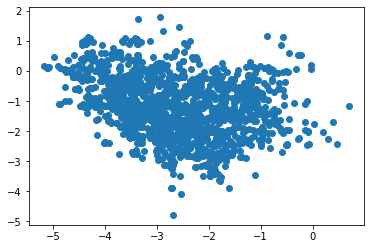

In [174]:

plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

The code above first filters and keeps the data points that belong to cluster label 0 and then creates a scatter plot.

See how we passed a Boolean series to filter [label == 0]. Indexed the filtered data and passed to plt.scatter as (x,y) to plot. x = filtered_label0[:, 0] , y = filtered_label0[:, 1].

In [175]:
pd.DataFrame(google_pca)

,0,1,2,3,4,5,6
0,-1.038410,-2.782614,2.372037,-0.253132,-0.358587,-1.957610,-2.262318
1,-1.093234,-2.837594,2.312001,-0.256617,-0.366213,-1.947198,-2.194894
2,-1.094823,-2.830713,2.310147,-0.259342,-0.372139,-1.951529,-2.192936
3,-0.984195,-2.817272,2.388742,-0.427016,-0.431189,-1.598262,-2.144391
4,-1.094823,-2.830713,2.310147,-0.259342,-0.372139,-1.951529,-2.192936
...,...,...,...,...,...,...,...
5451,4.980499,2.748248,-0.382306,-2.887031,2.911125,1.481455,1.433705
5452,5.664246,1.125046,-0.583048,-0.781696,0.023706,1.448035,1.180901
5453,6.059594,1.540178,-0.889062,-1.353608,0.038070,1.448651,1.567796
5454,5.065021,2.955698,-0.513493,-2.524673,3.014003,1.021183,0.763886


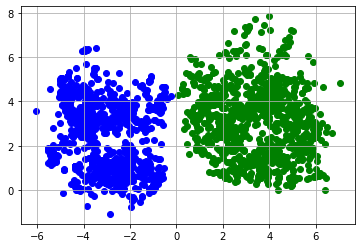

In [182]:
#filter rows of original data
filtered_label2 = google_pca[label == 2]
 
filtered_label3 = google_pca[label == 3]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'b')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'g')
plt.grid()
plt.show()

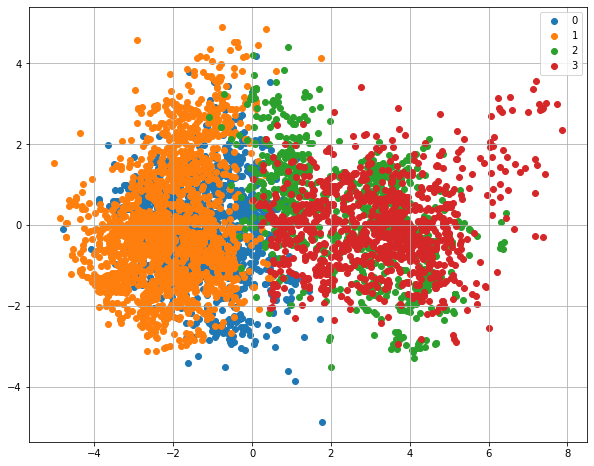

In [183]:
#Getting unique labels
centroids=km.cluster_centers_ 
u_labels = np.unique(label)
 
#plotting the results:
plt.figure(figsize=(10,8))
for i in u_labels:
    
    plt.scatter(google_pca[label == i , 1] , google_pca[label == i , 6] , label = i)
#     plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.grid()
plt.legend()
plt.show()

### Summary 

At cluster=4 this above model is able to cluster only two categories(cat3 and cat1) and    
the cat2 and cat4 is not getting cluster clearly ,there is soft boundries.
Reason for this  may be the less availability of variables or records. 